<a href="https://colab.research.google.com/github/Sahanave/WomenWhoCodeHSIDemo/blob/main/HSIDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hyperspectral Images dataset**

Thanking the authors of the paper [Hyperspectral Image Dataset for Benchmarking on Salient Object Detection](https://arxiv.org/abs/1806.11314). 

In [2]:
from pathlib import Path
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import color



In [3]:
!pip install chart_studio
import chart_studio.plotly as py
import chart_studio



### Objective

Object detection using supervised or unsupervised approaches on colour images is a huge field. Recently, a few studies demonstrated that efficient salient object detection can also be implemented by using visible spectrum of hyperspectral images. 

**What we have** : A hyperspectral salient object detection dataset with a collection of 60 hyperspectral images with their respective ground-truth binary images and corresponding colour images (sRGB).



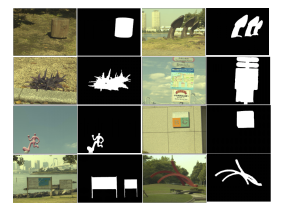

## Dataset 

In [4]:
!wget http://data.airc.aist.go.jp/HS-SOD/HS-SOD.zip
!unzip HS-SOD.zip


--2020-10-26 02:13:15--  http://data.airc.aist.go.jp/HS-SOD/HS-SOD.zip
Resolving data.airc.aist.go.jp (data.airc.aist.go.jp)... 163.220.33.57
Connecting to data.airc.aist.go.jp (data.airc.aist.go.jp)|163.220.33.57|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.airc.aist.go.jp/HS-SOD/HS-SOD.zip [following]
--2020-10-26 02:13:16--  https://data.airc.aist.go.jp/HS-SOD/HS-SOD.zip
Connecting to data.airc.aist.go.jp (data.airc.aist.go.jp)|163.220.33.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5549583419 (5.2G) [application/zip]
Saving to: ‘HS-SOD.zip’

HS-SOD.zip          100%[===================>]   5.17G  65.0MB/s    in 81s     

2020-10-26 02:14:37 (65.2 MB/s) - ‘HS-SOD.zip’ saved [5549583419/5549583419]

Archive:  HS-SOD.zip
   creating: HS-SOD/
  inflating: HS-SOD/LICENSE          
   creating: HS-SOD/hyperspectral/
  inflating: HS-SOD/hyperspectral/0082.mat  
  inflating: HS-SOD/hyperspectral/0079.mat  
  infl

# Investigate the labels

In [4]:
 
 Paths = [path for path in Path('HS-SOD').glob('*')]

In [5]:
print(Paths)

[PosixPath('HS-SOD/LICENSE'), PosixPath('HS-SOD/ground_truth'), PosixPath('HS-SOD/color'), PosixPath('HS-SOD/hyperspectral')]


In [6]:
ground_truth =[str(path)for path in Path('HS-SOD/ground_truth').glob('*')]

In [7]:
rgb_images = [str(path) for path in Path('HS-SOD/color').glob('*')]

In [8]:
hsi_images = [str(path) for path in Path('HS-SOD/hyperspectral').glob('*')]

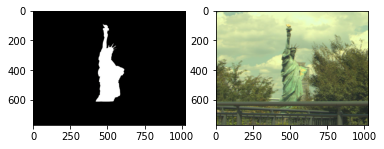

In [9]:
image1 = plt.imread(ground_truth[0])
image2 = plt.imread(rgb_images[0])
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)
plt.show()

In [10]:
# It is to be noted that the authors did the saved hyper-cubes for each scene in ”.mat” file format after sensor dark-noise correction. 

# Prepare

In [ ]:
Complete_data = []
Label = []
file_names = []
for index,inputs in enumerate(hsi_images):
  with h5py.File(inputs, 'r') as f:
      file_names.append(inputs)
      data = np.array(f['hypercube'])
      data = data.reshape(data.shape[0]*data.shape[1],data.shape[2])
      GT = plt.imread(ground_truth[index])
      GT = color.rgb2gray(GT)
      y = GT.reshape(GT.shape[0]*GT.shape[1])
      Complete_data.append(data)
      Label.append(y)
      
        